In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
def value_in_col(df, col):
        string = []
        for i,row in df.loc[:, col].iteritems(): 
            if row not in (string):
                string.append(row)             
        values = {}
        for i,s in enumerate(string):
            values[s] = i
        for i,row in df.loc[:, col].iteritems():
            df.loc[i, col] = values[row]
        return df
def train(file):
    df = pd.read_csv(file)
    group = df.columns.to_series().groupby(df.dtypes).groups
    values = {k.name: v for k, v in group.items()}
    name = values['object']
    for i in name:
        value_in_col(df,i)
    for i in df.iloc[:, 0:]:
        df[i] = df[i].astype(float)
    names = []
    for col in df.columns:
        names.append(col)
    scaler = MinMaxScaler()
    for i in names:
        df[i] = scaler.fit_transform(df[i].values.reshape(-1, 1))
    km = KMeans(n_clusters=3)
    y_predicted = km.fit_predict(df.iloc[:, 0:])
    df['cluster'] = y_predicted
    sse = []
    k_rng = range(1,20)
    for k in k_rng:
        km = KMeans(n_clusters=k)
        km.fit(df.iloc[:, 0:])
        sse.append(km.inertia_)
    plt.xlabel('K')
    plt.ylabel('Sum of squared error')
    return plt.plot(k_rng,sse) 

def test(trainfile,testfile,cluster_on_train):
    df = pd.read_csv(trainfile)
    count_row1 = df.shape[0]
    df2 = pd.read_csv(testfile)
    df = pd.concat([df, df2], ignore_index=True)
    count_row2 = df.shape[0]
    group = df.columns.to_series().groupby(df.dtypes).groups
    values = {k.name: v for k, v in group.items()}
    name = values['object']
    for i in name:
        value_in_col(df,i)
    for i in df.iloc[:, 0:]:
        df[i] = df[i].astype(float)
    names = []
    for col in df.columns:
        names.append(col)
    scaler = MinMaxScaler()
    for i in names:
        df[i] = scaler.fit_transform(df[i].values.reshape(-1, 1))
    km = KMeans(n_clusters=cluster_on_train)
    y_predicted = km.fit_predict(df.iloc[:, 0:])
    df['cluster'] = y_predicted
    list = []
    for i,row in df.loc[count_row1:count_row2].iterrows():
        list.append(row['cluster'])
    percent = {}
    for i in list:
        percent[i] = list.count(i)/len(list)
    return percent


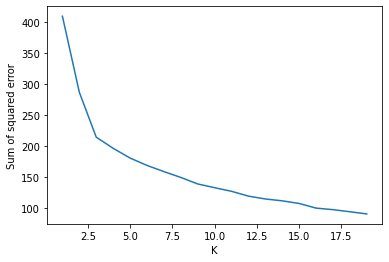

In [3]:
train('csv_result-Clustering1-NoClass-Train.csv')

In [6]:
test('csv_result-Clustering1-NoClass-Train.csv','csv_result-Clustering1-NoClass-Test.csv',10)

{8.0: 0.8, 2.0: 0.2}